In [1]:
import pandas as pd 
import numpy as np 
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.ensemble import AdaBoostRegressor
# for drawing graph 
import plotly.express as px

In [2]:
#df = pd.ExcelFile('C:/Users/halil/Desktop/soalr_data.xlsx').parse('sheet 1')
weather_raw = pd.read_excel('C:/Users/halil/Desktop/soalr_data.xlsx',sheet_name="weather")
guneko_raw = pd.read_excel('C:/Users/halil/Desktop/soalr_data.xlsx',sheet_name="1000255-GUNEKO")

guneko_production = guneko_raw[["Date","Production"]]
guneko_gti = guneko_raw[["Date.1","GTI"]]


weather_guneko = weather_raw.loc[weather_raw.name ==1000255]
ali = pd.merge(guneko_production,weather_guneko,left_on="Date",right_on="date")
dataset = ali.drop(["name","date"],axis=1)

In [14]:
dataset1 = dataset.set_index("Date")

In [ ]:
i = "global_rad:W"
graph = px.line(dataset1,x=dataset1.index,y=i,labels={'Time': "month", f'{i}': "something"},title=f"{i} Over Time")
graph.show()

# Define the split time
split_time = 1000

# Get the train set 
time_train = time[:split_time]
x_train = series[:split_time]

# Get the validation set
time_valid = time[split_time:]
x_valid = series[split_time:]

In [55]:
dataset1.head(5)

,Production,lat,lon,temperature,cloud cover,global_rad:W,diffuse_rad:W,direct_rad:W,relative_humidity_2m:p,wind_speed_10m:ms,prob_precip_1h:p,t_apparent:C,sun_elevation:d
Date,,,,,,,,,,,,,
2020-01-01 00:00:00,0.0,37.446481,37.996659,6.1,32.7,0.0,0.0,0.0,94.5,0.5,1.0,6.1,-74.4
2020-01-01 01:00:00,0.0,37.446481,37.996659,5.1,24.1,0.0,0.0,0.0,97.6,0.9,1.0,5.1,-74.2
2020-01-01 02:00:00,0.0,37.446481,37.996659,4.3,17.5,0.0,0.0,0.0,98.6,1.0,1.0,4.3,-65.7
2020-01-01 03:00:00,0.0,37.446481,37.996659,3.9,12.0,0.0,0.0,0.0,98.6,0.9,1.0,3.9,-55.2
2020-01-01 04:00:00,0.0,37.446481,37.996659,2.4,81.7,0.0,0.0,0.0,100.0,1.0,1.0,2.4,-43.4


In [53]:
def trend(time, slope=0):
    """
    Generates synthetic data that follows a straight line given a slope value.

    Args:
      time (array of int) - contains the time steps
      slope (float) - determines the direction and steepness of the line

    Returns:
      series (array of float) - measurements that follow a straight line
    """

    # Compute the linear series given the slope
    series = slope * time

    return series

def seasonal_pattern(season_time):
    """
    Just an arbitrary pattern, you can change it if you wish
    
    Args:
      season_time (array of float) - contains the measurements per time step

    Returns:
      data_pattern (array of float) -  contains revised measurement values according 
                                  to the defined pattern
    """

    # Generate the values using an arbitrary pattern
    data_pattern = np.where(season_time < 0.4,
                    np.cos(season_time * 2 * np.pi),
                    1 / np.exp(3 * season_time))
    
    return data_pattern

def seasonality(time, period, amplitude=1, phase=0):
    """
    Repeats the same pattern at each period

    Args:
      time (array of int) - contains the time steps
      period (int) - number of time steps before the pattern repeats
      amplitude (int) - peak measured value in a period
      phase (int) - number of time steps to shift the measured values

    Returns:
      data_pattern (array of float) - seasonal data scaled by the defined amplitude
    """
    
    # Define the measured values per period
    season_time = ((time + phase) % period) / period

    # Generates the seasonal data scaled by the defined amplitude
    data_pattern = amplitude * seasonal_pattern(season_time)

    return data_pattern

def noise(time, noise_level=1, seed=None):
    """Generates a normally distributed noisy signal

    Args:
      time (array of int) - contains the time steps
      noise_level (float) - scaling factor for the generated signal
      seed (int) - number generator seed for repeatability

    Returns:
      noise (array of float) - the noisy signal
    """

    # Initialize the random number generator
    rnd = np.random.RandomState(seed)

    # Generate a random number for each time step and scale by the noise level
    noise = rnd.randn(len(time)) * noise_level
    
    return noise
def plot_series(time, series, format="-", start=0, end=None):
  """
  Visualizes time series data

  Args:
    time (array of int) - contains the time steps
    series (array of int) - contains the measurements for each time step
    format - line style when plotting the graph
    label - tag for the line
    start - first time step to plot
    end - last time step to plot
  """

  # Setup dimensions of the graph figure
  plt.figure(figsize=(10, 6))
  
  if type(series) is tuple:

    for series_num in series:
      # Plot the time series data
      plt.plot(time[start:end], series_num[start:end], format)

  else:
    # Plot the time series data
    plt.plot(time[start:end], series[start:end], format)

  # Label the x-axis
  plt.xlabel("Time")

  # Label the y-axis
  plt.ylabel("Value")

  # Overlay a grid on the graph
  plt.grid(True)

  # Draw the graph on screen
  plt.show()

In [91]:

deneme_data = dataset["diffuse_rad:W"][:1300]
deneme_time = dataset.index[:1300]

In [92]:
# Define the split time
split_time = 1000

# Get the train set 
time_train = deneme_time[:split_time]
x_train = deneme_data[:split_time]

# Get the validation set
time_valid = deneme_time[split_time:]
x_valid = deneme_data[split_time:]

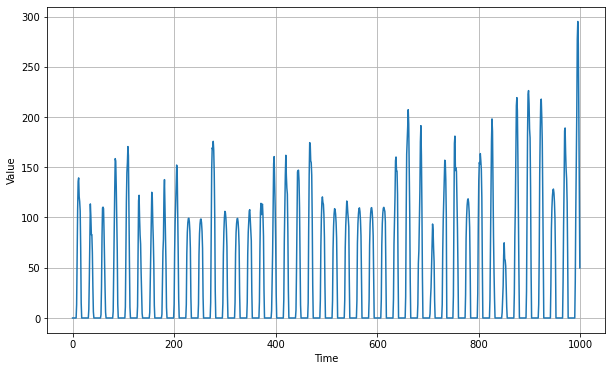

In [93]:
plot_series(time_train, x_train)

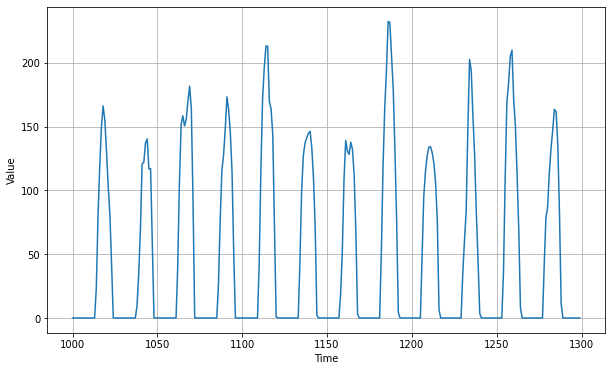

In [94]:
# Plot the validation set
plot_series(time_valid, x_valid)

In [96]:
# Generate the naive forecast
naive_forecast = deneme_data[split_time - 1:-1]

# Define time step
time_step = 100



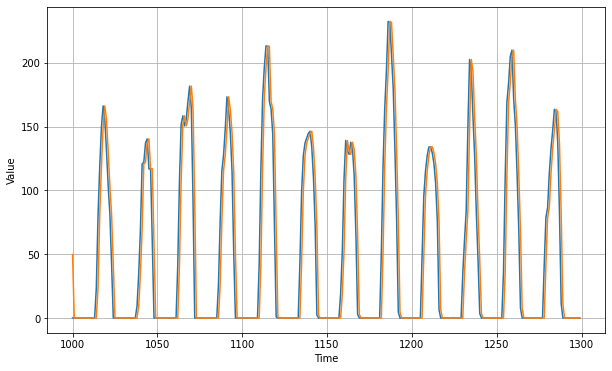

In [97]:
# Plot the results
plot_series(time_valid, (x_valid, naive_forecast))

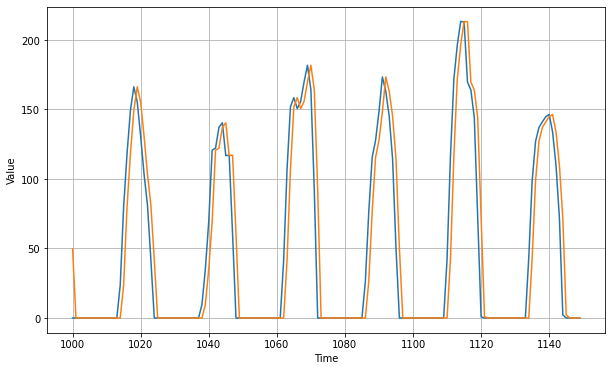

In [98]:

plot_series(time_valid, (x_valid, naive_forecast), start=0, end=150)

In [99]:
import sklearn

In [105]:
print(sklearn.metrics.mean_squared_error(x_valid, naive_forecast))
print(sklearn.metrics.mean_absolute_error(x_valid, naive_forecast))

657.4567333333334
14.309333333333331
